40
796.2712674494246 115.60170769530316
142.817087201626 179.76251949988722
809.2174618561947 475.1663153616822
569.2095836334619 419.13080819501926
215.96636057401216 514.9889496635899
882.1743474541537 377.334988751696
28.108756839415634 34.94272000016759
903.3962289263476 917.8383385253899
43.103291376030406 170.2992650202398
669.5625329050933 672.579862816697
407.00751996740206 732.8984207784886
500.56494784942225 778.3518834055985
327.10986029604607 717.0368499687279
302.0597294188173 320.0796363652895
610.4965118485972 764.0513153580081
224.67260703687748 967.2382418353901
254.40205535078962 37.953326474831215
670.6886167377965 145.79762530359955
72.97904817687296 72.57257575069474
502.4682250207529 895.7755802449741
90.01922640363188 587.274542211433
621.0830852435623 999.898318339626
261.3561960942425 144.06520737220737
518.6042120870544 19.52142990869341
512.7961689452271 882.9174577515297
786.3719203023187 850.3567370775874
166.08228415064767 993.0779735419402
232.20988905195

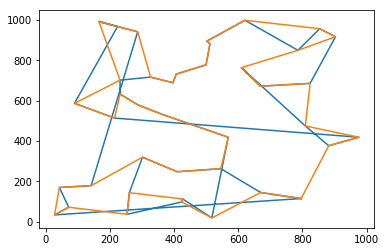

In [1]:
from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
from mpl_toolkits.mplot3d import Axes3D
from numpy import (linspace,logspace,zeros,ones,outer,meshgrid,
                   pi,sin,cos,sqrt,exp)
import random
from numpy.random import normal
%matplotlib inline
import math
import numpy as np
from collections import namedtuple
import itertools
import sys
from time import time
#созд именной кортеж
Point = namedtuple("Point", ['x', 'y'])
class TSP(object):
    #конструктор класса тсп
    def __init__(self, points):
        #колво точек в наборе
        self.count = len(points)
        #набор точек
        self.points = points
        #делаем цикл из набора точек
        self.tour = list(range(len(points))) + [0]
        #self.tour1 = list(range(len(points))) + [0]
        #длина цикла
        self.size = self.tourlength(self.tour)
        #self.size1 = self.tourlength(self.tour1)
    #вывод ответа
    def __str__(self, numbers):
        #послед точек
        posl = []
        for i in self.tour:
            posl.append(numbers[i])
        res = ' '.join(map(str, posl))
        return res
    @staticmethod
    #расстояние между точками
    def distance(t1, t2):
        #print(t1.x)
        return math.sqrt((t1.x - t2.x)*(t1.x - t2.x) + (t1.y - t2.y)*(t1.y - t2.y)) 
    #длина ребра
    def edgelength(self, v1, v2):
        t1 = self.points[v1]
        t2 = self.points[v2]
        return self.distance(t1, t2)
    #длина цикла
    def tourlength(self,tour):
        return sum(self.edgelength(v1, v2) for v1, v2 in zip(tour[:-1], tour[1:]))
    #def tour1length(self):
        #return sum(self.edgelength(v1, v2) for v1, v2 in zip(self.tour1[:-1], self.tour1[1:]))
    def picture(self,tour):
        coordx = []
        coordy = []
        for v1 in tour:
            coordx.append(int(self.points[v1].x))
            coordy.append(int(self.points[v1].y))
            print(self.points[v1].x, ' ', self.points[v1].y)
        plot(coordx, coordy)
            
    #жадный алгоритм ближайшего соседа
    def nearneighbour(self):
        #каждый раз выбираем ближайшую точку и добавляем  в набор
        tour = [0]
        maybe = set(self.tour[1:-1])
        while (maybe):
            closest = None
            closestdist = math.inf
            curpoint = tour[-1]
            for sosed in maybe:
                sosedist = int(self.edgelength(curpoint, sosed) * 1e3)
                if closestdist > sosedist:
                    closest = sosed
                    closestdist = sosedist
            tour.append(closest)
            maybe.remove(closest)
        tour.append(0)
        self.size = self.tourlength(tour)
        self.tour = tour
        self.picture(self.tour)
        return (tour, self.size)
#для улучшения сформированного nearest neigbour цикла восспользуемся 2-opt local search
class TWOOPT(TSP):
    def swap(self, begin, end):
        #удаляем пересекающиеся рёбра и заменяем на условно параллельные, если путь стал меньше, то 1
        improv = False
        newtour = self.tour[:begin] + self.tour[begin:end + 1][::-1] + self.tour[end + 1:]
        newsize = self.size - \
                  (self.edgelength(self.tour[begin - 1], self.tour[begin]) +
                   self.edgelength(self.tour[end], self.tour[(end + 1)])) + \
                  (self.edgelength(newtour[begin - 1], newtour[begin]) +
                   self.edgelength(newtour[end], newtour[(end + 1)]))
        if  (newsize<self.size):
            self.tour = newtour
            self.size = newsize
            improv = True
        return improv
    """
    def combinations(self, tour, node1, node2, node3):
        
        combo_1 = tour[:node1[0] + 1] + tour[node1[1]:node2[0] + 1] + tour[node2[1]: node3[0] + 1] + tour[node3[1]: ]
        combo_2 = tour[:node1[0] + 1] + tour[node1[1]:node2[0] + 1] + tour[node3[0]: node2[1] - 1: -1] + tour[node3[1]: ]
        combo_3 = tour[:node1[0] + 1] + tour[node2[0]:node1[1] - 1: -1] + tour[node2[1]: node3[0] + 1] + tour[node3[1]: ]
        combo_4 = tour[:node1[0] + 1] + tour[node2[0]:node1[1] - 1: -1] + tour[node3[0]: node2[1] - 1: -1] + tour[node3[1]: ]
        combo_5 = tour[:node1[0] + 1] + tour[node2[1]: node3[0] + 1] + tour[node1[1]:node2[0] + 1] + tour[node3[1]: ]
        combo_6 = tour[:node1[0] + 1] + tour[node2[1]: node3[0] + 1] + tour[node2[0]:node1[1] - 1: -1] + tour[node3[1]: ]
        combo_7 = tour[:node1[0] + 1] + tour[node3[0]: node2[1] - 1: -1] + tour[node1[1]:node2[0] + 1] + tour[node3[1]: ]
        combo_8 = tour[:node1[0] + 1] + tour[node3[0]: node2[1] - 1: -1] + tour[node2[0]:node1[1] - 1: -1] + tour[node3[1]: ]

        combinations_array = [combo_1, combo_2, combo_3, combo_4, combo_5, combo_6, combo_7, combo_8]
        distances_array = list(map(lambda x: self.tourlength(x), combinations_array))
        min_distance = int(np.argmin(distances_array))
        return combinations_array[min_distance], distances_array[min_distance]
        # self.random_solution = np.array(combinations_array[min_distance])
        # self.total_cost = distances_array[min_distance]
    def three_opt(self):
        newtour=self.tour1
        
        all_combinations = list(itertools.combinations(range(len(newtour)), 3))
       
        # Select any random city including first and last city
        random_city = np.random.randint(low=0, high=len(newtour))
        # Keep only valid combinations, i.e combinations containing the random selected city
        all_combinations = list(filter(lambda x: random_city in x, all_combinations))
        # Remove consecutive numbers to avoid overlaps and invalid cities
        # all_combinations = list(filter(lambda x: x[1] != x[0] + 1 and x[2] != x[1] + 1, all_combinations))
        t=time()
        for idx, item in enumerate(all_combinations): 
            if (time() - t >= 20):
                break
            
            # print('Iteration count is {} and item a, c, e is {}' .format(idx, item))
            a1, c1, e1 = item
            b1, d1, f1 = a1+1, c1+1, e1+1

            
            self.tour1, self.size1 = self.generate_combinations(newtour, [a1, b1], [c1, d1], [e1, f1])
        """
    def solvingprocess(self, tlimit=30):
        
        
        zhadtour, zhadsize = self.nearneighbour()
        improv = True
        t = time()
        while (improv):
            if tlimit and time() - t >= tlimit:
                break
            improv = False
            workspace = itertools.combinations(range(1, self.count), 2)
            for start, end in workspace:
                if self.swap(start, end):
                    improv = True
                    break
        self.picture(self.tour)
        if zhadsize < self.size :
            self.tour = zhadtour
            self.size = zhadsize
        #if (self.three_opt()):
                #print(self.tour1)
            #if self.size1<self.size :
                #self.tour = self.tour1
                #self.size = self.size1
Points = []
answer = []
#count=int(input())
count = int(random.uniform(10, 50))

print(count)

for k in range(count):
    rx=random.uniform(10.5, 1000.5)
    ry=random.uniform(10.5, 1000.5)
    print(rx,ry)
    #inpt = input().split()
    answer.append(k+1)
    #Points.append(Point(float(inpt[0]), float(inpt[1])))
    Points.append(Point(rx,ry))
do = TWOOPT(Points)
do.solvingprocess()
print(do.__str__(answer))
